In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Dense Networks vs CNNs (Beginner-Friendly Guide)

## 🧱 What is a Dense Network?
A **Dense Network** (also called a **Fully Connected Network**) means:  
- Every neuron in one layer is connected to **every neuron** in the next layer.  

Imagine this:  
- You have 3 inputs: `[2, 5, 7]`  
- You have 4 neurons in the next layer.  
👉 Each of those 4 neurons looks at **all 3 inputs**, not just one.  

It’s called **dense** because it’s “densely connected” — no input is left out.  

---

## ⚡ Example
Let’s say we’re classifying MNIST digits (handwritten 0–9).  

- **Input layer**: 784 numbers (28×28 image flattened).  
- **Dense hidden layer**: 128 neurons.  
  - Each neuron sees all 784 numbers.  
- **Dense output layer**: 10 neurons.  
  - Each one guesses how likely the image is "0", "1", ..., "9".  

---

## 🧠 Why use Dense Networks?
- They’re **simple and general**: they can approximate almost any function if you make them big enough.  
- Great for beginners → you don’t need to know special tricks, just connect everything.  
- Work well on **structured data** (like numbers in a table: house prices, stock data, medical data).  

---

## 👓 Why not always Dense?
- Dense layers don’t know **spatial structure** (like “this pixel is next to that pixel”).  
- That’s why CNNs are better for **images** (they look at patches, not everything at once).  
- RNNs/Transformers are better for **sequences** (like text or speech).  

---

## 📚 What do beginners use when learning deep learning?
Most people **start with Dense Networks** because:
- Easier to understand (just layers of connected nodes).  
- Works well on MNIST digits → the “Hello World” of deep learning.  
- Builds intuition: inputs → weights → activation → outputs.  

After Dense, learners usually move to:
1. **CNNs** → for images.  
2. **RNNs / Transformers** → for text and sequences.  
3. **More advanced architectures**.  

---

## ✅ In short:
- **Dense Network** = all neurons connected → simple, good for starters.  
- Most beginners first learn **Dense (Fully Connected) Networks**, then move to CNNs when they want to do image stuff.  

## 1. Load Dataset

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


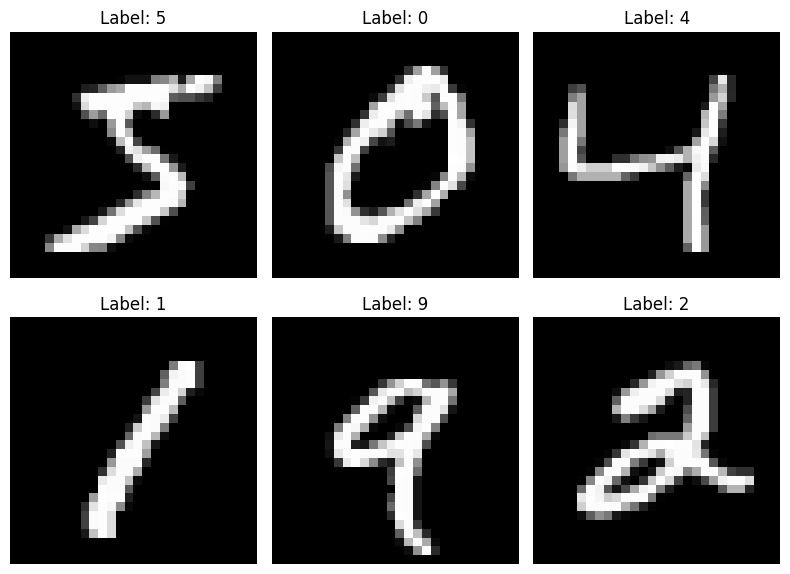

In [18]:
#Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print dataset information
print (f"Training data shape: {x_train.shape}")
print (f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

#Display a sample image
plt.figure(figsize=(8, 6))
plt.subplot(2, 3, 1)
plt.imshow(x_train[0], cmap="gray")
plt.title(f'Label: {y_train[0]}')
plt.axis('off')

# Show a few more examples.
for i in range(1, 6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## 3. Preprocess

In [19]:
# Normalize pixels
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images (for Dense model)
x_train_dense = x_train.reshape(-1, 28*28)  # flatten images
x_test_dense = x_test.reshape(-1, 28*28)

# Reshape images → 4D (for CNN model)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Note:
# Flattening = turning that 2D grid into 1 long line (1D vector).
# Why do we flatten?
# - In a Dense (Fully Connected) network → each neuron expects a list of numbers, not a grid.
# - Downside: it forgets the image shape (which pixels are neighbors). That’s why Dense-only models don’t “see” as well as CNNs.

# What does reshape mean?
# In NumPy (and TensorFlow), reshape changes the shape of an array (how many dimensions it has) without changing the actual data inside.
# Dense model:
# - It expects a 1D array of numbers.
# CNN model:
# - It expects 4D input: (batch_size, height, width, channels)

# Reshape function:
# - (batch_size, height, width, channels) is the most common input shape for CNNs.
# - (batch_size, ...) means "the batch size is whatever it needs to be".
# - (-1, ...) means "whatever size we need".
#   (example: instead of (60000, 28, 28) we use (-1, 28, 28))

## 4. Define the model

In [20]:
dense_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),  # hidden layer
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # output layer: 10 classes
])

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

d:\cs\nti\applying labs\deeplearning\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\cs\nti\applying labs\deeplearning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 5. Compile (choose loss + optimizer)

In [21]:
dense_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

## 6. Train

In [26]:
# Train the models
print("\nTraining Dense Model...")
dense_model.fit(x_train_dense, y_train, epochs=5, batch_size=32)

print("\nTraining CNN Model...")
cnn_model.fit(x_train_cnn, y_train, epochs=5, batch_size=32, verbose=2)


Training Dense Model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9895 - loss: 0.0324
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9904 - loss: 0.0292
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9919 - loss: 0.0241
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9930 - loss: 0.0212
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9933 - loss: 0.0200

Training CNN Model...
Epoch 1/5
1875/1875 - 10s - 6ms/step - accuracy: 0.9561 - loss: 0.1470
Epoch 2/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9850 - loss: 0.0487
Epoch 3/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9898 - loss: 0.0330
Epoch 4/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9919 - loss: 0.0252
Epoch 5/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9939 - loss: 0.0198


## 7. Evaluate

In [27]:
dense_loss, dense_acc = dense_model.evaluate(x_test_dense, y_test)

cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test)

print("Dense Model Accuracy:", dense_acc)
print("CNN Model Accuracy:", cnn_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9775 - loss: 0.1022
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9915 - loss: 0.0270
Dense Model Accuracy: 0.9775000214576721
CNN Model Accuracy: 0.9915000200271606


## 8. Test Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step


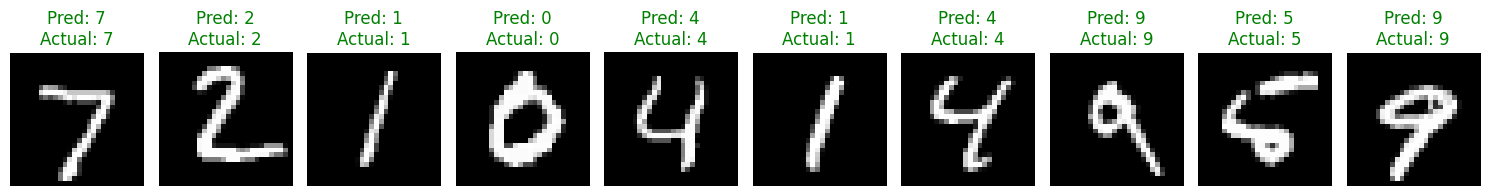

In [25]:
# Make predictions on test set
predictions = dense_model.predict(x_test_dense)

# Function to display predictions
def display_predictions(num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        
        # Reshape back to 28x28 for display
        plt.imshow(x_test_dense[i].reshape(28, 28), cmap='gray')

        # Get predicted and actual labels
        predicted_label = np.argmax(predictions[i])
        actual_label = y_test[i]  # no need for argmax

        # Color: green if correct, red if wrong
        color = 'green' if predicted_label == actual_label else 'red'
        plt.title(f'Pred: {predicted_label}\nActual: {actual_label}', color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample predictions
display_predictions()
